# [Leaky Integrate and Fire (LIF) Neuron Model](https://compneuro.neuromatch.io/tutorials/W0D2_PythonWorkshop2/student/W0D2_Tutorial1.html)

$$
\begin{align}
\tau_m\,\frac{d}{dt}\,V(t) &= E_{L} - V(t) + R\,I(t) &\text{if }\quad V(t) \leq V_{th} \\
V(t) &= V_{reset} &\text{otherwise}
\end{align}
$$

$\tau_m$ : Membrane Time Constant  
$V(t)$ : Membrane Potential  
$E_{L}$ : Leak Potential  
$R$ : Membrane Resistance  
$I(t)$ : Synaptic Input Current  
$V_{th}$ : Firing Threshold  
$V_{reset}$ : Reset Voltage

In [1]:
"""Simulation Parameters"""
t_max = 150e-3 # second
dt = 1e-3      # second
tau = 20e-3    # second
el = -60e-3    # milivolt
vr = -70e-3    # milivolt
vth = -50e-3   # milivolt
r = 100e6      # ohm
i_mean = 25e-11 # amphere

## $I(t)$: Simulating Synaptic Input with a Sinusoidal Model

\begin{equation}
I(t)=I_{mean}\left(1+\sin\left(\frac{2 \pi}{0.01}\,t\right)\right)
\end{equation}

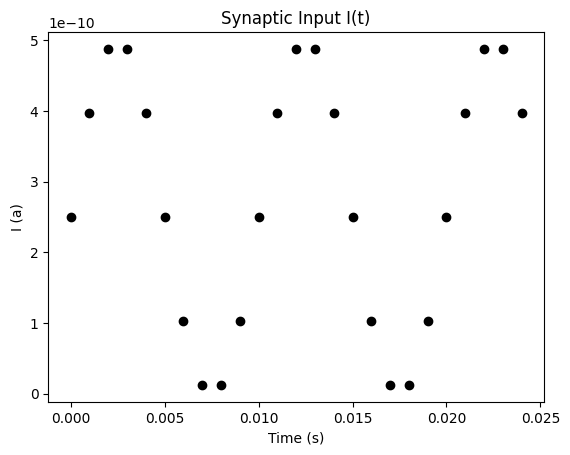

In [2]:
import numpy as np
from matplotlib import pyplot as plt

step_end = 25

plt.figure()
plt.title("Synaptic Input I(t)")
plt.ylabel("I (a)")
plt.xlabel("Time (s)")

for step in range(step_end):
    t = step * dt
    i = i_mean * (1 + np.sin(t * 2 * np.pi / 0.01))
    plt.plot(t, i, "ko")

plt.show()

## $V(t)$: Simulating Membrane Potential using Discrete Time Integration

$$
\begin{align}
\tau_m\,\frac{V\left(t+\Delta t\right)-V\left(t\right)}{\Delta t} = E_{L} - V(t) + R\,I(t) \\
V(t + \Delta t) =  V(t) + \frac{\Delta t}{\tau_m}\left( E_L -V(t) + R I(t) \right)
\end{align}
$$

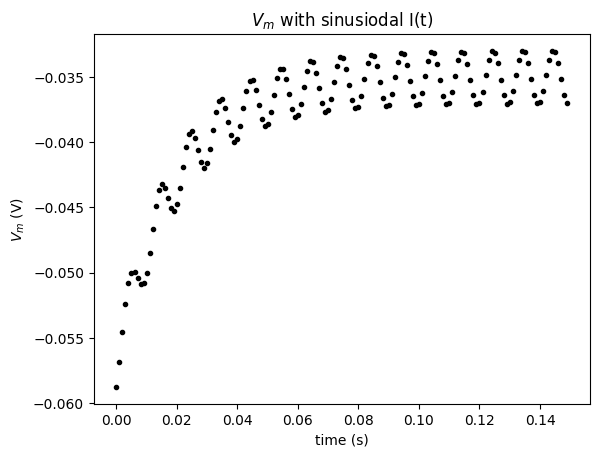

In [3]:
step_end = int(t_max / dt)

plt.figure()
plt.title("$V_m$ with sinusiodal I(t)")
plt.xlabel("time (s)")
plt.ylabel('$V_m$ (V)')


# Initialize v0
v = el

for step in range(step_end):
  t = step * dt
  i = i_mean * (1 + np.sin(t * 2 * np.pi / 0.01))
  v = v + dt/tau * (el - v + r*i)
  plt.plot(t, v, "k.")

plt.show()

## Randomizing Synaptic Input

$$
\begin{equation}
I(t) = I_{mean}\left(1+0.1\sqrt{\frac{t_{max}}{\Delta t}}\,\xi(t)\right)\qquad\text{with }\xi(t)\sim \mathcal{U}(-1,1)
\end{equation}
$$

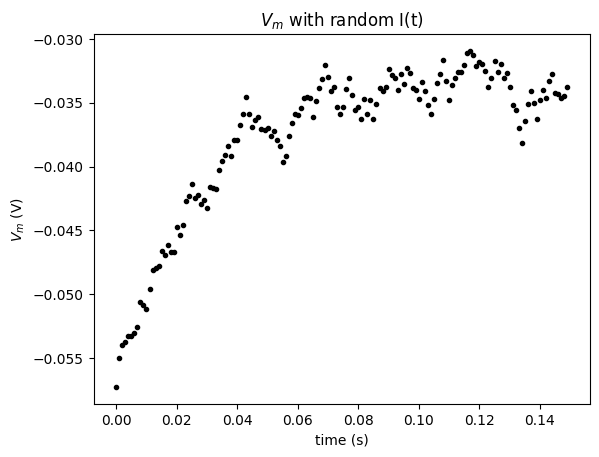

In [4]:
np.random.seed(2020)

step_end = int(t_max / dt)
v = el

plt.figure()
plt.title("$V_m$ with random I(t)")
plt.xlabel("time (s)")
plt.ylabel("$V_m$ (V)")

for step in range(step_end):
  t = step * dt
  random_num = np.random.random() * 2 - 1
  i = i_mean * (1 + 0.1 * random_num * np.sqrt(t_max / dt))
  v = v + dt/tau * (el - v + r*i)

  plt.plot(t, v, "k.")

plt.show()

## Ensemble Statistics

$$
\begin{align}
\left\langle V(t)\right\rangle &= \frac{1}{N}\sum_{n=1}^N V_n(t) & & \text{sample mean}\\
\left\langle (V(t)-\left\langle V(t)\right\rangle)^2\right\rangle &= \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)^2 & & \text{sample variance} \\
\left\langle \left(V(t)-\left\langle V(t)\right\rangle\right)\left(V(s)-\left\langle V(s)\right\rangle\right)\right\rangle
&= \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)\left(V_n(s)-\left\langle V(s)\right\rangle\right) & & \text{sample autocovariance}
\end{align}
$$

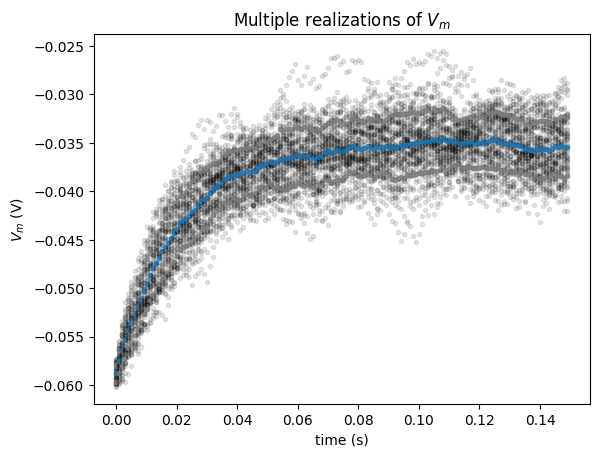

In [5]:
np.random.seed(2020)

step_end = int(t_max / dt)
n = 50
# ensemble statistics
v_n = [el] * n

plt.figure()
plt.title("Multiple realizations of $V_m$")
plt.xlabel("time (s)")
plt.ylabel("$V_m$ (V)")

for step in range(step_end):
  t = step * dt
  # loop for n simulations
  for j in range(0, n):
    # compute randomized synaptic input for this simulation
    i = i_mean * (1 + 0.1 * np.sqrt(t_max/dt) * (2 * np.random.random() - 1))
    # compute membrane potential for this simulation
    v_n[j] = v_n[j] + dt/tau * (el - v_n[j] + r*i)
  # plot simulations
  plt.plot([t] * n, v_n, "k.", alpha=0.1)
  # plot sample mean
  v_mean = sum(v_n) / n
  plt.plot(t, v_mean, "C0.", alpha=0.8)

  # compute sample variance
  v_var_n = [(v_mean - x)**2 for x in v_n]
  v_var = sum(v_var_n) / (n - 1)
  # compute standard deviation
  v_std = np.sqrt(v_var)

  # plot standard deviation
  plt.plot(t, v_mean + v_std, "C7.", alpha=0.8)
  plt.plot(t, v_mean - v_std, "C7.", alpha=0.8)

plt.show()

### Rewrite using NumPy

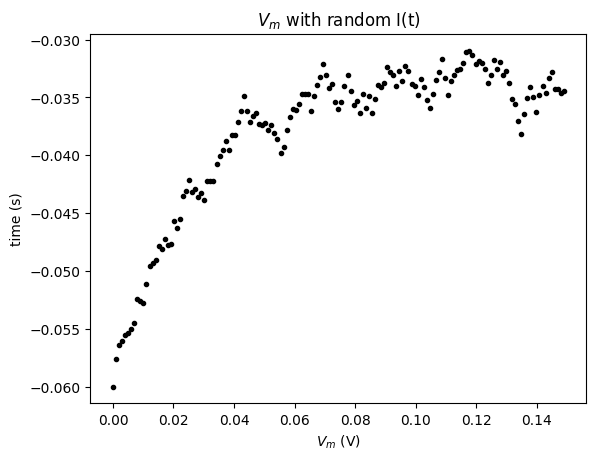

In [6]:
np.random.seed(2020)

step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

i = i_mean * (1 + 0.1 * np.sqrt(t_max/dt) * (2 * np.random.random(step_end) - 1))

for step, i_step in enumerate(i):
  if step == 0:
    continue

  v[step] = v[step - 1] + dt/tau * (el - v[step - 1] + r*i_step)

plt.figure()
plt.title('$V_m$ with random I(t)')
plt.ylabel('time (s)')
plt.xlabel('$V_m$ (V)')

plt.plot(t_range, v, "k.")
plt.show()

### Using 2D arrays

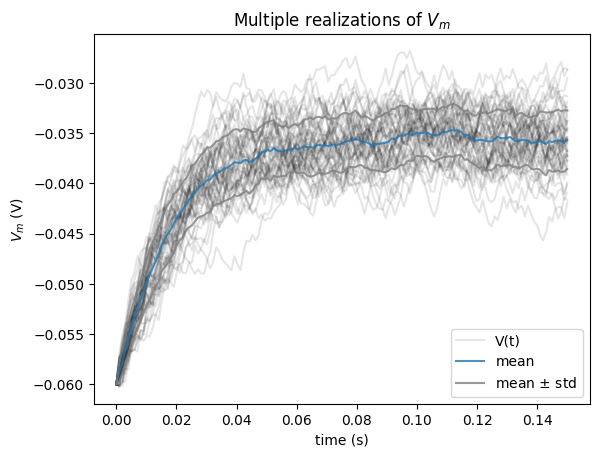

In [7]:
np.random.seed(2020)

step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * (2 * np.random.random([n, step_end]) - 1))

for step in range(1, step_end):
    v_n[:, step] = v_n[:, step - 1] + dt / tau * (
        el - v_n[:, step - 1] + r * i[:, step]
    )

v_mean = np.mean(v_n, axis=0)
v_std = np.std(v_n, axis=0)

plt.figure()
plt.title("Multiple realizations of $V_m$")
plt.xlabel("time (s)")
plt.ylabel("$V_m$ (V)")
plt.plot(t_range, v_n.T, "k", alpha=0.1)

plt.plot(t_range, v_n[-1], "k", alpha=0.1, label="V(t)")
plt.plot(t_range, v_mean, "C0", alpha=0.8, label="mean")
plt.plot(t_range, v_mean+v_std, "C7", alpha=0.8)
plt.plot(t_range, v_mean-v_std, "C7", alpha=0.8, label=r"mean $\pm$ std")

plt.legend()
plt.show()

### Plotting a Histogram

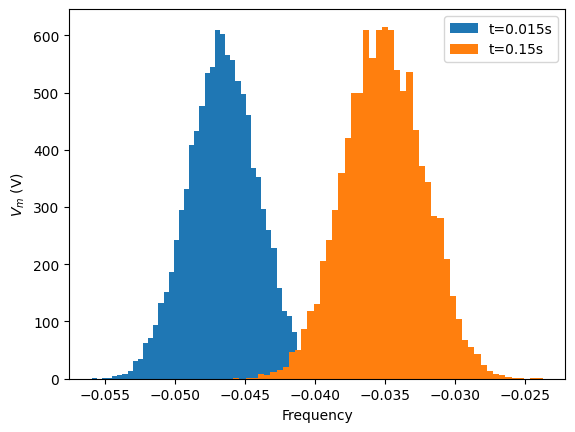

In [8]:
np.random.seed(2020)

t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 10000
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))
nbins = 50

for step, t in enumerate(t_range):
  # skip first iteration
  if step == 0:
    continue
  
  v_n[:, step] = v_n[:, step - 1] + (dt/tau) * (el - v_n[:,step-1] + r * i[:, step])

plt.figure()
plt.xlabel("Frequency")
plt.ylabel("$V_m$ (V)")


t_max_10 = t_max / 10
plt.hist(v_n[:, int(t_max_10 / dt)], nbins, label=f"t={t_max_10}s", histtype='stepfilled', linewidth=0)
plt.hist(v_n[:, -1], nbins, label=f"t={t_max}s", histtype='stepfilled', linewidth=0)

plt.legend()
plt.show()

## Adding Spiking Activity to the LIF Neuron

$$
\begin{equation}
V(t) = V_{reset}\quad \text{ if } V(t)\geq V_{th}
\end{equation}
$$

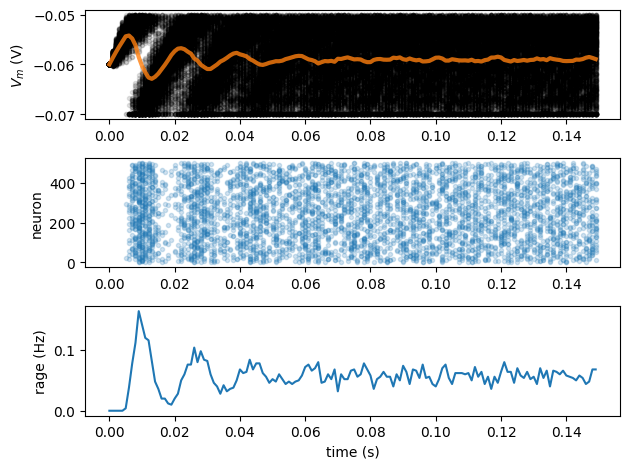

In [18]:
np.random.seed(2020)

t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random([n, step_end]) - 1))

spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

for step, t in enumerate(t_range):
  if step == 0:
    continue
  v_n[:, step] = v_n[:, step-1] + (dt/tau) * (el - v_n[:, step-1] + r*i[:, step])
  for j in range(n):
    if v_n[j, step] >= vth:
      v_n[j, step] = vr
      spikes[j] += [t]
      spikes_n[step] += 1

v_mean = np.mean(v_n, axis=0)
spikes_mean = spikes_n / n

plt.figure()

ax1 = plt.subplot(3, 1, 1)
for j in range(n):
  plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.1)
plt.plot(t_range, v_mean, "C1", alpha=0.8, linewidth=3)
plt.ylabel("$V_m$ (V)")

plt.subplot(3, 1, 2, sharex=ax1)
for j in range(n):
  times = np.array(spikes[j])
  plt.scatter(times,  j * np.ones_like(times), color="C0", marker=".", alpha=0.2)

plt.ylabel("neuron")

plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_range, spikes_mean)
plt.xlabel('time (s)')
plt.ylabel('rage (Hz)')

plt.tight_layout()

In [10]:
def plot_all(t_range, v, raster=None, spikes=None, spikes_mean=None):
  """
  Plots Time evolution for
  (1) multiple realizations of membrane potential
  (2) spikes
  (3) mean spike rate (optional)

  Args:
    t_range (numpy array of floats)
        range of time steps for the plots of shape (time steps)

    v (numpy array of floats)
        membrane potential values of shape (neurons, time steps)

    raster (numpy array of floats)
        spike raster of shape (neurons, time steps)

    spikes (dictionary of lists)
        list with spike times indexed by neuron number

    spikes_mean (numpy array of floats)
        Mean spike rate for spikes as dictionary

  Returns:
    Nothing.
  """

  v_mean = np.mean(v, axis=0)
  fig_w, fig_h = plt.rcParams['figure.figsize']
  plt.figure(figsize=(fig_w, 1.5 * fig_h))

  ax1 = plt.subplot(3, 1, 1)
  for j in range(n):
    plt.scatter(t_range, v[j], color="k", marker=".", alpha=0.01)
  plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
  plt.xticks([])
  plt.ylabel(r'$V_m$ (V)')

  if raster is not None:
    plt.subplot(3, 1, 2)
    spikes_mean = np.mean(raster, axis=0)
    plt.imshow(raster, cmap='Greys', origin='lower', aspect='auto')

  else:
    plt.subplot(3, 1, 2, sharex=ax1)
    for j in range(n):
      times = np.array(spikes[j])
      plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)

  plt.xticks([])
  plt.ylabel('neuron')

  if spikes_mean is not None:
    plt.subplot(3, 1, 3, sharex=ax1)
    plt.plot(t_range, spikes_mean)
    plt.xlabel('time (s)')
    plt.ylabel('rate (Hz)')

  plt.tight_layout()
  plt.show()


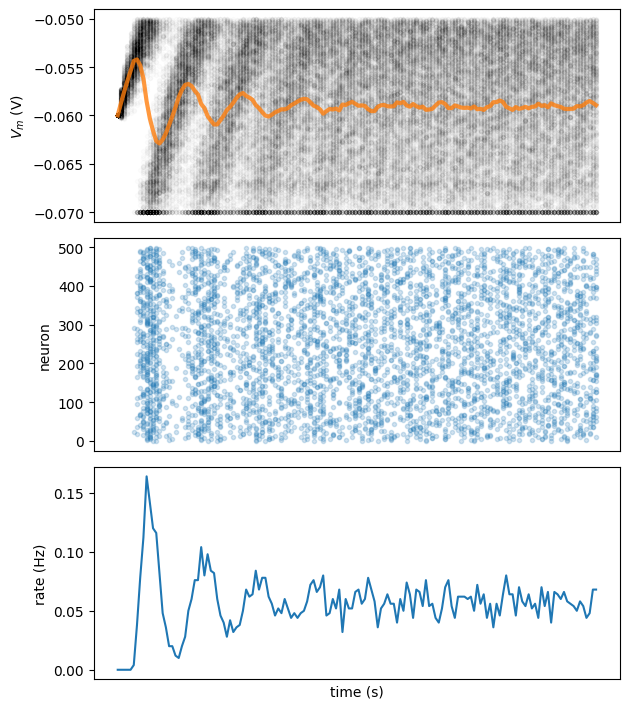

In [19]:
np.random.seed(2020)

t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random([n, step_end]) - 1))

spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

for step, t in enumerate(t_range):
  if step == 0:
    continue

  v_n[:, step] = v_n[:, step-1] + (dt/tau) * (el - v_n[:, step-1] + r*i[:, step])
  spiked = v_n[:, step] > vth
  v_n[spiked, step] = vr

  for j in np.where(spiked)[0]:
    spikes[j] += [t]
    spikes_n[step] += 1

spikes_mean = spikes_n / n

plot_all(t_range, v_n, spikes=spikes, spikes_mean=spikes_mean)

### Making a binary raster plot

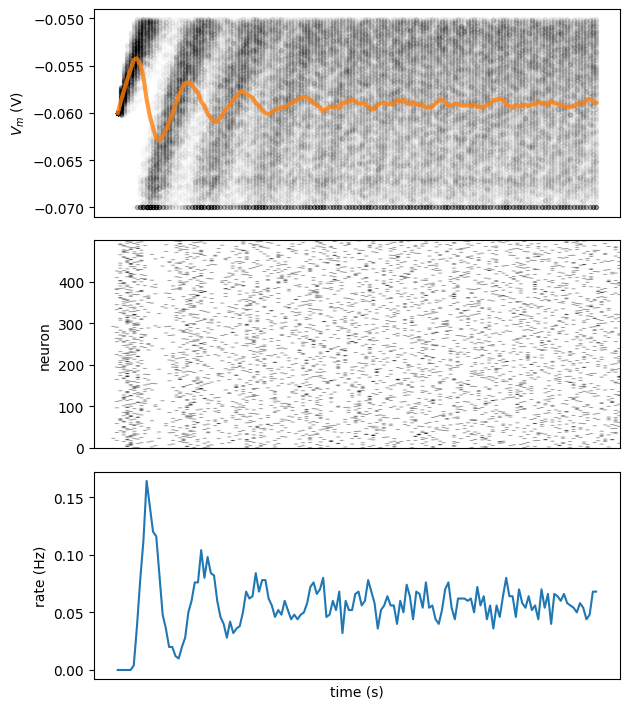

In [ ]:
np.random.seed(2020)

t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random([n, step_end]) - 1))

raster = np.zeros([n, step_end])

for step, t in enumerate(t_range):
  if step == 0:
    continue

  v_n[:, step] = v_n[:, step-1] + (dt/tau) * (el - v_n[:, step-1] + r*i[:, step])
  spiked = (v_n[:, step] >= vth)
  v_n[spiked, step] = vr

  raster[spiked, step] = 1

plot_all(t_range, v_n, raster)

## Refractory Period

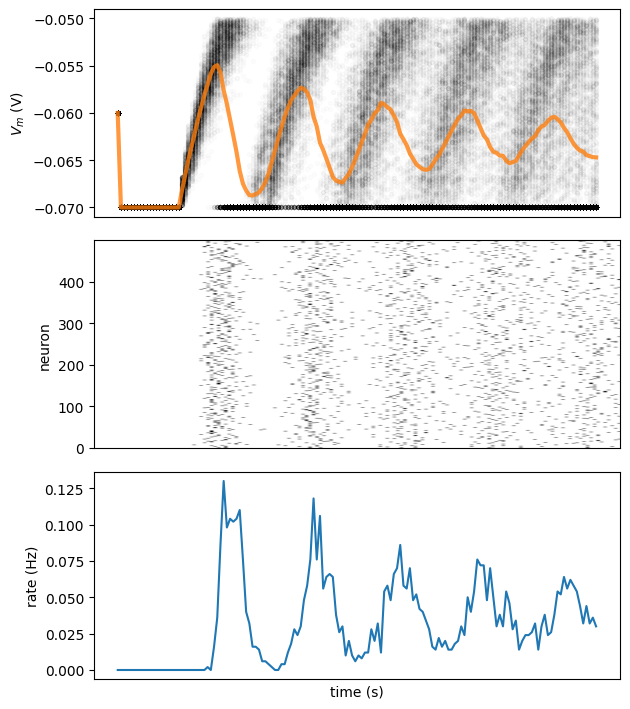

In [30]:
np.random.seed(2020)

t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random([n, step_end]) - 1))

raster = np.zeros([n, step_end])

t_ref = 0.01
last_spike = t_ref * np.ones([n])

for step, t in enumerate(t_range):
  if step == 0:
    continue

  v_n[:, step] = v_n[:, step-1] + (dt/tau) * (el - v_n[:, step-1] + r*i[:, step])
  spiked = (v_n[:, step] >= vth)
  v_n[spiked, step] = vr

  raster[spiked, step] = 1.

  clamped = last_spike + t_ref > t
  v_n[clamped, step] = vr
  last_spike[spiked] = t

plot_all(t_range, v_n, raster)

In [31]:
# @markdown Execute this cell to enable the demo
import ipywidgets as widgets

def random_ref_period(mu, sigma):
  # set random number generator
  np.random.seed(2020)

  # initialize step_end, t_range, n, v_n, syn and raster
  t_range = np.arange(0, t_max, dt)
  step_end = len(t_range)
  n = 500
  v_n = el * np.ones([n,step_end])
  syn = i_mean * (1 + 0.1*(t_max/dt)**(0.5)*(2*np.random.random([n,step_end])-1))
  raster = np.zeros([n,step_end])

  # initialize t_ref and last_spike
  t_ref = mu + sigma*np.random.normal(size=n)
  t_ref[t_ref<0] = 0
  last_spike = -t_ref * np.ones([n])

  # loop time steps
  for step, t in enumerate(t_range):
    if step==0:
      continue

    v_n[:,step] = v_n[:,step-1] + dt/tau * (el - v_n[:,step-1] + r*syn[:,step])

    # boolean array spiked indexes neurons with v>=vth
    spiked = (v_n[:,step] >= vth)
    v_n[spiked,step] = vr
    raster[spiked,step] = 1.

    # boolean array clamped indexes refractory neurons
    clamped = (last_spike + t_ref > t)
    v_n[clamped,step] = vr
    last_spike[spiked] = t

  # plot multiple realizations of Vm, spikes and mean spike rate
  plot_all(t_range, v_n, raster)

  # plot histogram of t_ref
  plt.figure(figsize=(8,4))
  plt.hist(t_ref, bins=32, histtype='stepfilled', linewidth=0, color='C1')
  plt.xlabel(r'$t_{ref}$ (s)')
  plt.ylabel('count')
  plt.tight_layout()

_ = widgets.interact(random_ref_period, mu = (0.01, 0.05, 0.01), \
                              sigma = (0.001, 0.02, 0.001))

interactive(children=(FloatSlider(value=0.02, description='mu', max=0.05, min=0.01, step=0.01), FloatSlider(va…

### Rewrite with functions

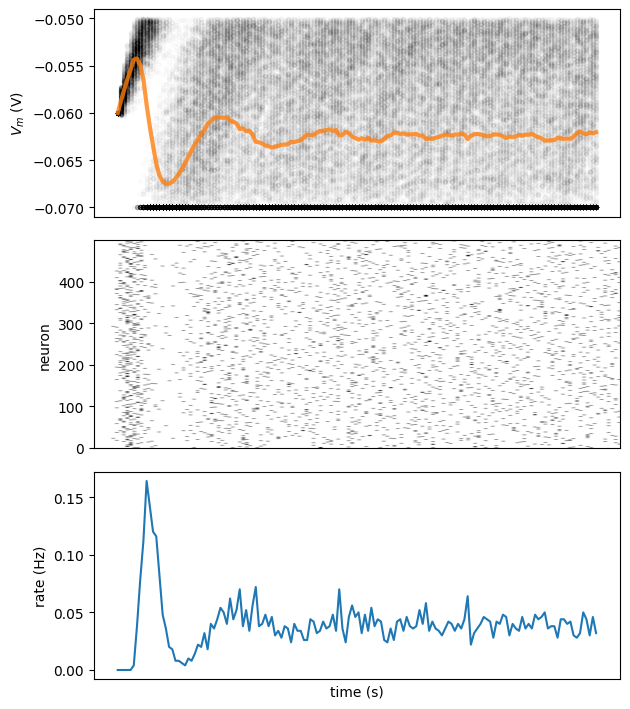

In [32]:
def ode_step(v, i, dt):
  """
  Evolves membrane potential by one step of discrete time integration

  Args:
    v (numpy array of floats)
      membrane potential at previous time step of shape (neurons)

    i (numpy array of floats)
      synaptic input at current time step of shape (neurons)

    dt (float)
      time step increment

  Returns:
    v (numpy array of floats)
      membrane potential at current time step of shape (neurons)
  """
  v = v + dt/tau * (el - v + r*i)

  return v


def spike_clamp(v, delta_spike):
  """
  Resets membrane potential of neurons if v >= vth
  and clamps to vr if interval of time since last spike < t_ref

  Args:
    v (numpy array of floats)
      membrane potential of shape (neurons)

    delta_spike (numpy array of floats)
      interval of time since last spike of shape (neurons)

  Returns:
    v (numpy array of floats)
      membrane potential of shape (neurons)
    spiked (numpy array of floats)
      boolean array of neurons that spiked  of shape (neurons)
  """
  # Boolean array spiked indexes neurons with v>=vth
  spiked = v >= vth
  v[spiked] = vr

  # Boolean array clamped indexes refractory neurons
  clamped = t_ref > delta_spike
  v[clamped] = vr

  return v, spiked


# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize t_ref and last_spike
mu = 0.01
sigma = 0.007
t_ref = mu + sigma*np.random.normal(size=n)
t_ref[t_ref<0] = 0
last_spike = -t_ref * np.ones([n])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:,step] = ode_step(v_n[:,step-1], i[:,step], dt)

  # Reset membrane potential and clamp
  v_n[:,step], spiked = spike_clamp(v_n[:,step], t - last_spike)

  # Update raster and last_spike
  raster[spiked,step] = 1.
  last_spike[spiked] = t

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, raster)

### Making a LIF class

In [ ]:
# Simulation class
class LIFNeurons:
  """
  Keeps track of membrane potential for multiple realizations of LIF neuron,
  and performs single step discrete time integration.
  """
  def __init__(self, n, t_ref_mu=0.01, t_ref_sigma=0.002,
               tau=20e-3, el=-60e-3, vr=-70e-3, vth=-50e-3, r=100e6):

    # Neuron count
    self.n = n

    # Neuron parameters
    self.tau = tau        # second
    self.el = el          # milivolt
    self.vr = vr          # milivolt
    self.vth = vth        # milivolt
    self.r = r            # ohm

    # Initializes refractory period distribution
    self.t_ref_mu = t_ref_mu
    self.t_ref_sigma = t_ref_sigma
    self.t_ref = self.t_ref_mu + self.t_ref_sigma * np.random.normal(size=self.n)
    self.t_ref[self.t_ref<0] = 0

    # State variables
    self.v = self.el * np.ones(self.n)
    self.spiked = self.v >= self.vth
    self.last_spike = -self.t_ref * np.ones([self.n])
    self.t = 0.
    self.steps = 0


  def ode_step(self, dt, i):

    # Update running time and steps
    self.t += dt
    self.steps += 1

    # One step of discrete time integration of dt
    self.v = self.v + dt / self.tau * (self.el - self.v + self.r * i)


    # Spike and clamp
    self.spiked = self.v >= self.vth
    self.v[self.spiked] = self.vr
    self.last_spike[self.spiked] = self.t
    clamped = self.t_ref > (self.t - self.last_spike)
    self.v[clamped] = self.vr

    self.last_spike[self.spiked] = self.t

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize neurons
neurons = LIFNeurons(n)

# Loop over time steps
for step, t in enumerate(t_range):

  # Call ode_step method
  neurons.ode_step(dt, i[:,step])

  # Log v_n and spike history
  v_n[:,step] = neurons.v
  raster[neurons.spiked, step] = 1.

# Report running time and steps
print(f'Ran for {neurons.t:.3}s in {neurons.steps} steps.')

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, raster)